In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
LABELS = ["Normal", "Fraud"]



In [2]:
dataset = pd.read_csv("D:\CC.csv")

In [3]:
total = len(dataset)
fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0]

print('Normal Transactions {}'.format(len(normal)))
print('Fraudulent Transactions {}'.format(len(fraud)))
print('Total Trnsactions {}'.format(total))

Normal Transactions 284315
Fraudulent Transactions 492
Total Trnsactions 284807


In [4]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [5]:
print("Amount details of the normal transaction")
normal.Amount.describe()

Amount details of the normal transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
dataset.isnull().values.any()

False

In [7]:
dataset.drop_duplicates(inplace=True)


Text(0, 0.5, 'No of occurences')

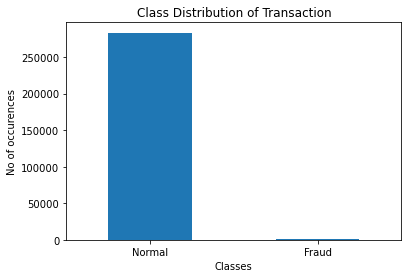

In [8]:
set_class = pd.value_counts(dataset['Class'], sort = True)
set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

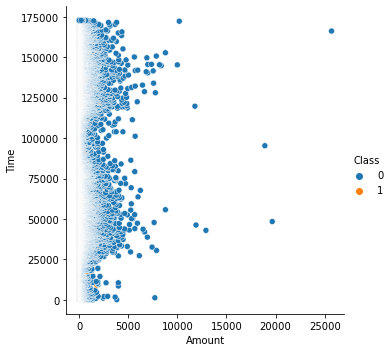

In [9]:
sns.relplot(x= 'Amount', y= 'Time', hue= 'Class', data=dataset)

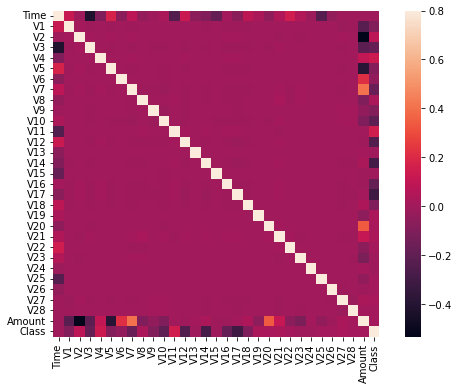

In [10]:
corrmat = dataset.corr()
fig = plt.figure(figsize = (9, 6))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
dataset['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [12]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
min(dataset.Amount),max(dataset.Amount)

(0.0, 25691.16)

In [14]:

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [15]:
sc = StandardScaler()
amount = dataset['Amount'].values
dataset['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
dataset['Amount']

0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
284802   -0.350252
284803   -0.254325
284804   -0.082239
284805   -0.313391
284806    0.513290
Name: Amount, Length: 283726, dtype: float64

Under Sampling

In [16]:
normal_sample = normal.sample(n=492)

In [17]:
new_dataset = pd.concat([normal_sample,fraud],axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192793,129851.0,-1.184950,0.822296,-0.378234,-0.885636,-0.354416,-0.084705,0.233937,0.958013,-0.007582,...,0.066457,-0.108431,0.109040,0.614873,-0.462204,-0.213868,-0.207681,-0.013723,80.00,0
268836,163404.0,-0.440572,1.351265,-0.948803,-0.561723,0.521762,-0.870183,0.552194,0.381118,0.118938,...,-0.347552,-0.964810,0.151530,0.445100,-0.362523,0.128898,0.203835,0.070795,9.99,0
51709,45085.0,1.153213,0.081131,0.753950,0.978086,-0.771634,-0.998278,0.070982,-0.220483,0.310528,...,-0.175143,-0.335653,0.050335,0.971625,0.400365,0.231506,-0.020694,0.023630,28.41,0
135021,81074.0,-2.321836,1.755744,0.304492,-1.728890,-0.047626,-0.318776,0.375182,0.218751,0.880517,...,-0.186735,0.059548,0.041847,-0.273534,-0.205804,0.622200,-1.310732,-1.088617,1.84,0
238934,149885.0,-0.162060,0.753200,0.124752,-0.538914,0.429052,-1.092591,1.029743,-0.230321,0.140628,...,-0.217123,-0.459015,0.094936,-0.030229,-0.383636,0.211901,0.116580,0.087787,17.72,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0, 0.5, 'No of occurences')

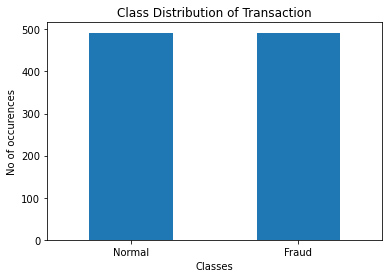

In [21]:
set_class = pd.value_counts(new_dataset['Class'], sort = True)
set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

In [22]:
dataset.shape

(283726, 31)

In [23]:
new_dataset.shape

(984, 31)

In [24]:
new_dataset.drop(['Time'], axis=1, inplace=True)

In [25]:
new_dataset.shape

(984, 30)

In [26]:

from sklearn.tree import DecisionTreeClassifier

In [27]:
X = new_dataset.drop('Class', axis = 1)
y = new_dataset['Class']

In [28]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
192793 -1.184950  0.822296 -0.378234 -0.885636 -0.354416 -0.084705  0.233937   
268836 -0.440572  1.351265 -0.948803 -0.561723  0.521762 -0.870183  0.552194   
51709   1.153213  0.081131  0.753950  0.978086 -0.771634 -0.998278  0.070982   
135021 -2.321836  1.755744  0.304492 -1.728890 -0.047626 -0.318776  0.375182   
238934 -0.162060  0.753200  0.124752 -0.538914  0.429052 -1.092591  1.029743   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [29]:
print(y)

192793    0
268836    0
51709     0
135021    0
238934    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (787, 29) (197, 29)


In [32]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [33]:
acc = accuracy_score(y_test, rf_yhat)
print('Accuracy score of the Random Forest model is {}'.format(acc))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

print("The precision is {}".format(precision_score(y_test, rf_yhat)))
print("Error rate {}".format(1-acc))

rec = recall_score(y_test, rf_yhat)
print("The recall is {}".format(rec))

Accuracy score of the Random Forest model is 0.9238578680203046
F1 score of the Random Forest model is 0.923076923076923
The precision is 0.967741935483871
Error rate 0.07614213197969544
The recall is 0.8823529411764706


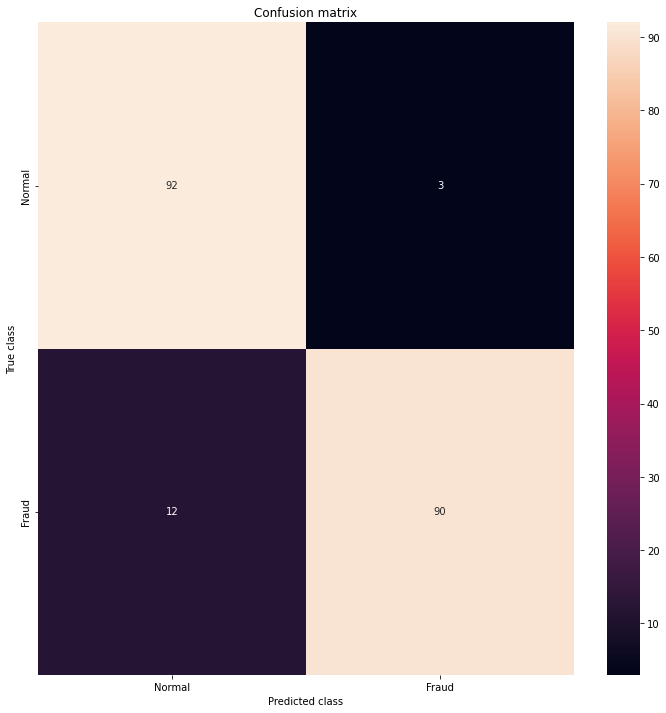

In [34]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, rf_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [35]:

DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)

In [36]:
acc = accuracy_score(y_test, tree_yhat)
print('Accuracy score of the Decision Tree model is {}'.format(acc))

print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print("The precision is {}".format(precision_score(y_test, tree_yhat)))

print("Error rate {}".format(1-acc))

rec = recall_score(y_test, tree_yhat)
print("The recall is {}".format(rec))

Accuracy score of the Decision Tree model is 0.9289340101522843
F1 score of the Decision Tree model is 0.9285714285714286
The precision is 0.9680851063829787
Error rate 0.07106598984771573
The recall is 0.8921568627450981


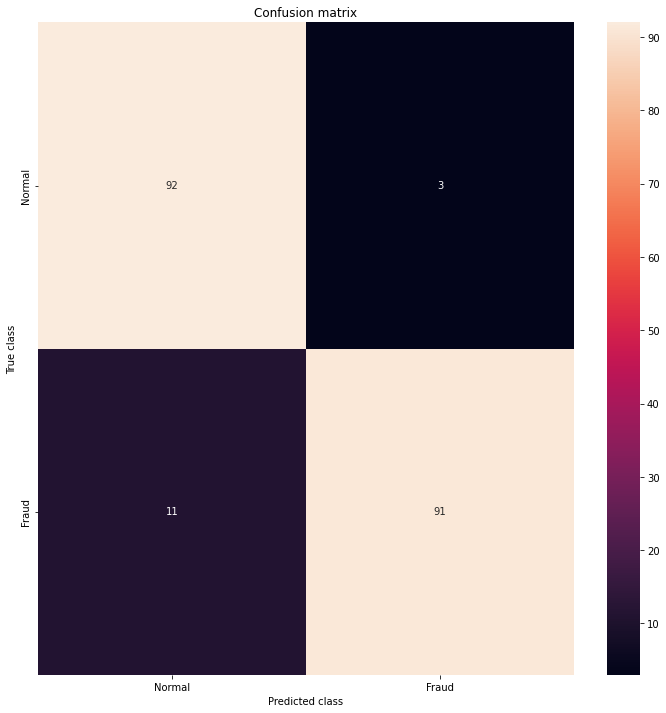

In [37]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, tree_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()